In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def load_images(path):

    images = []
    filenames = os.listdir(path)
    
    for filename in tqdm(filenames):    
        image = cv2.imread(os.path.join(path, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    
    return np.array(images)

In [3]:
!unzip /content/kth_tips_col_200x200.zip

Archive:  /content/kth_tips_col_200x200.zip
   creating: kth_tips_col_200x200/
   creating: kth_tips_col_200x200/KTH_TIPS/
   creating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/
  inflating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_1_col.png  
  inflating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_2_col.png  
  inflating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_3_col.png  
 extracting: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_4_col.png  
 extracting: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_5_col.png  
  inflating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_6_col.png  
  inflating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_7_col.png  
  inflating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_8_col.png  
 extracting: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_9_col.png  
  inflating: kth_tips_col_200x200/KTH_TIPS/aluminium_foil/15-s

In [8]:
main_dir = '/content/kth_tips_col_200x200/KTH_TIPS/'

classnames = ['aluminium_foil', 'brown_bread', 'corduroy',
               'cotton', 'cracker',
              'linen', 'orange_peel','sandpaper', 'sponge', 'styrofoam']

class_0 = load_images(main_dir+classnames[0])
class_1 = load_images(main_dir+classnames[1])
class_2 = load_images(main_dir+classnames[2])
class_3 = load_images(main_dir+classnames[3])
class_4 = load_images(main_dir+classnames[4])
class_5 = load_images(main_dir+classnames[5])
class_6 = load_images(main_dir+classnames[6])
class_7 = load_images(main_dir+classnames[7])
class_8 = load_images(main_dir+classnames[8])
class_9 = load_images(main_dir+classnames[9])


100%|██████████| 81/81 [00:00<00:00, 640.26it/s]
<ipython-input-6-d8ff40205601>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)
100%|██████████| 81/81 [00:00<00:00, 610.77it/s]


In [9]:
classes = [class_0, class_1, class_2, class_3, 
           class_4, class_5, class_6, class_7, 
           class_8, class_9]

for class_images in classes:
    print(class_images.shape)

(81, 200, 200, 3)
(81,)
(81, 200, 200, 3)
(81, 200, 200, 3)
(81,)
(81, 200, 200, 3)
(81, 200, 200, 3)
(81, 200, 200, 3)
(81, 200, 200, 3)
(81, 200, 200, 3)


In [10]:
shapes = []
for image in class_6:
    if image.shape not in shapes:
        shapes.append(image.shape)

shapes

[(200, 200, 3)]

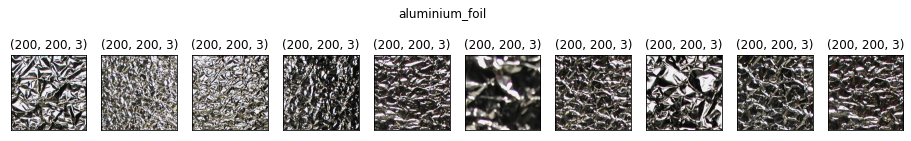

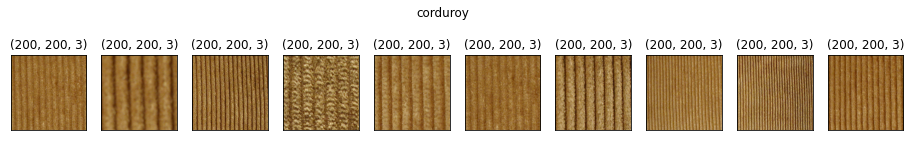

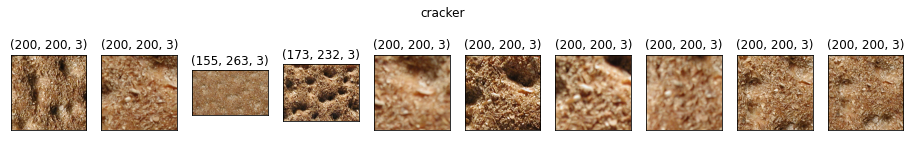

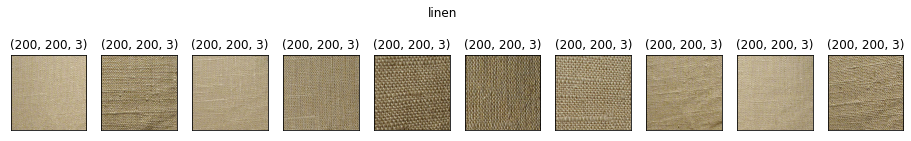

In [11]:
def show_raw_images(images, classname, start_index=0):
    fig, axes = plt.subplots(ncols=10, nrows=1, figsize=(16, 2.5))
    plt.suptitle(classname)

    index = start_index
    for i in range(10):
        axes[i].imshow(images[index])
        axes[i].set_title(images[index].shape)
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
        index += 1
    plt.show()

show_raw_images(class_0, classnames[0], start_index=20)
show_raw_images(class_2, classnames[2])
show_raw_images(class_4, classnames[4])
show_raw_images(class_5, classnames[5])

In [12]:
def preprocess_images(images):
    preprocessed_images = []
    for image in tqdm(images):
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = cv2.resize(image, dsize=(150,150))
        preprocessed_images.append(image)
    
    return np.array(preprocessed_images)

In [13]:
class_0_preprocessed = preprocess_images(class_0)
class_1_preprocessed = preprocess_images(class_1)
class_2_preprocessed = preprocess_images(class_2)
class_3_preprocessed = preprocess_images(class_3)
class_4_preprocessed = preprocess_images(class_4)
class_5_preprocessed = preprocess_images(class_5)
class_6_preprocessed = preprocess_images(class_6)
class_7_preprocessed = preprocess_images(class_7)
class_8_preprocessed = preprocess_images(class_8)
class_9_preprocessed = preprocess_images(class_9)

100%|██████████| 81/81 [00:00<00:00, 3647.93it/s]


In [15]:
all_images = np.vstack((class_0_preprocessed, class_1_preprocessed, 
                        class_2_preprocessed, class_3_preprocessed, 
                        class_4_preprocessed, class_5_preprocessed,
                        class_6_preprocessed, class_7_preprocessed, 
                        class_8_preprocessed, class_9_preprocessed 
                        ))
all_images.shape

(810, 150, 150)

In [26]:
no_of_samples = 81
labels = np.array([0]*no_of_samples + [1]*no_of_samples + \
                  [2]*no_of_samples + [3]*no_of_samples + \
                  [4]*no_of_samples + [5]*no_of_samples + \
                  [6]*no_of_samples + [7]*no_of_samples + \
                  [8]*no_of_samples + [9]*no_of_samples )
                 
labels[:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [27]:
X_train, X_test, y_train, y_test = train_test_split(all_images, 
                                                    labels, 
                                                    test_size=0.3)

print('X_train.shape\t', X_train.shape)
print('X_test.shape\t', X_test.shape)
print('y_train.shape\t', y_train.shape)
print('y_test.shape\t', y_test.shape)



X_train.shape	 (567, 150, 150)
X_test.shape	 (243, 150, 150)
y_train.shape	 (567,)
y_test.shape	 (243,)


In [28]:
def extract_lbp(images):
    lbps = []
    for image in tqdm(images):
        lbp = local_binary_pattern(image, P=8, R=1)
        lbps.append(lbp)
    
    return np.array(lbps)

In [29]:
X_train_lbp = extract_lbp(X_train)
X_test_lbp = extract_lbp(X_test)

100%|██████████| 243/243 [00:00<00:00, 264.10it/s]


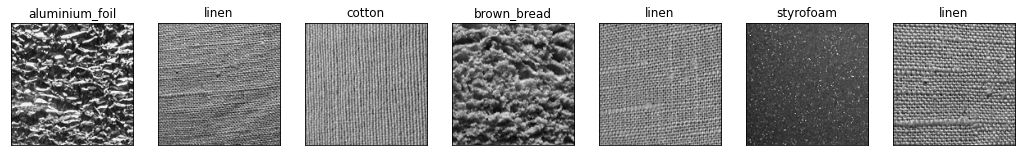

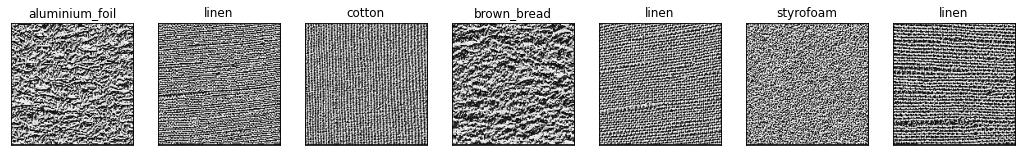

In [30]:
def show_images_with_labels(images, labels, start_index=0):
    fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(18, 2.5))

    index = start_index
    for i in range(7):
        axes[i].imshow(images[index], cmap='gray')
        axes[i].set_title(classnames[labels[index]])
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
        index += 1
    plt.show()
    
show_images_with_labels(X_train, y_train)
show_images_with_labels(X_train_lbp, y_train)

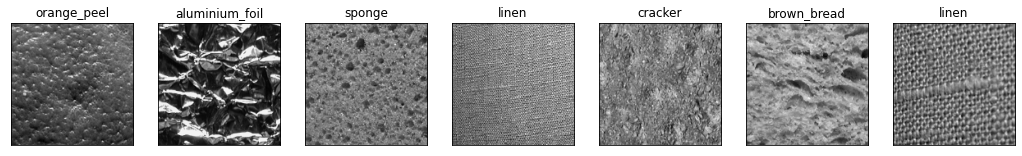

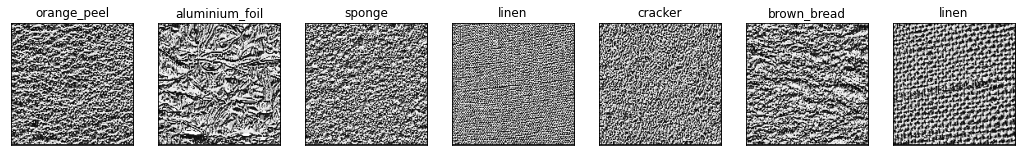

In [31]:
show_images_with_labels(X_train, y_train, start_index=7)
show_images_with_labels(X_train_lbp, y_train, start_index=7)

In [32]:
def create_histograms(images, sub_images_num, bins_per_sub_images):
    all_histograms = []
    for image in tqdm(images):
        grid = np.arange(0, image.shape[1]+1, image.shape[1]//sub_images_num)

        sub_image_histograms = []

        for i in range(1, len(grid)):
            for j in range(1, len(grid)):
                sub_image = image[grid[i-1]:grid[i], grid[j-1]:grid[j]]

                sub_image_histogram = np.histogram(sub_image, bins=bins_per_sub_images)[0]
                sub_image_histograms.append(sub_image_histogram)

        histogram = np.array(sub_image_histograms).flatten()
        all_histograms.append(histogram)
        
    return np.array(all_histograms)

In [33]:
X_train_hist = create_histograms(X_train_lbp, sub_images_num=3, bins_per_sub_images=64)
X_test_hist = create_histograms(X_test_lbp, sub_images_num=3, bins_per_sub_images=64)

print('X_train_hist\t', X_train_hist.shape)
print('X_test_hist\t', X_test_hist.shape)

100%|██████████| 243/243 [00:00<00:00, 566.00it/s]

X_train_hist	 (567, 576)
X_test_hist	 (243, 576)


In [34]:
model_svm = SVC()
model_svm.fit(X_train_hist, y_train)

print('SVM train acc\t:', model_svm.score(X_train_hist, y_train))
print('SVM test acc\t:', model_svm.score(X_test_hist, y_test))

SVM train acc	: 0.7689594356261023
SVM test acc	: 0.7736625514403292


In [35]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train_hist, y_train)

print('Logreg train acc\t:', model_logreg.score(X_train_hist, y_train))
print('Logreg test acc\t\t:', model_logreg.score(X_test_hist, y_test))

Logreg train acc	: 1.0
Logreg test acc		: 0.9135802469135802


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train_hist, y_train)

print('KNN train acc\t:', model_knn.score(X_train_hist, y_train))
print('KNN test acc\t:', model_knn.score(X_test_hist, y_test))

KNN train acc	: 1.0
KNN test acc	: 0.9094650205761317


In [37]:
predictions = model_knn.predict(X_test_hist)

In [38]:
def find_misclassifications(labels, preds):
    indices = []
    for i, (label, pred) in enumerate(zip(preds, labels)):
        if pred != label:
            indices.append(i)
    
    return np.array(indices)

misclassifications = find_misclassifications(y_test, predictions)
misclassifications

array([  7,  29,  31,  38,  47,  59,  67,  82,  84,  93, 106, 108, 131,
       132, 134, 147, 181, 186, 198, 206, 210, 212])

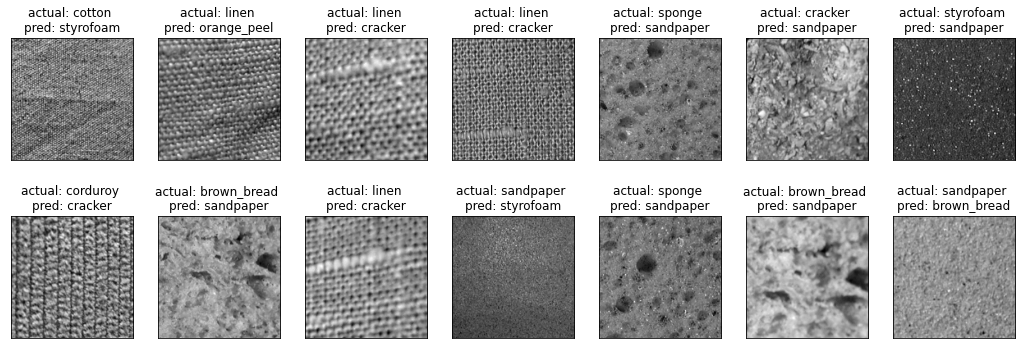

In [39]:
def show_misclassifications(images, misclassified, labels, preds, start_index=0):
    fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(18, 6))

    index = start_index
    for i in range(2):
        for j in range(7):
            axes[i,j].imshow(images[misclassified[index]], cmap='gray')
            axes[i,j].set_title(f'actual: {classnames[labels[misclassified[index]]]} \n' \
                                f'pred: {classnames[preds[misclassified[index]]]}')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            if index == (index+14):
                break
            index += 1
    plt.show()
    
show_misclassifications(X_test, misclassifications, y_test, predictions, start_index=0)

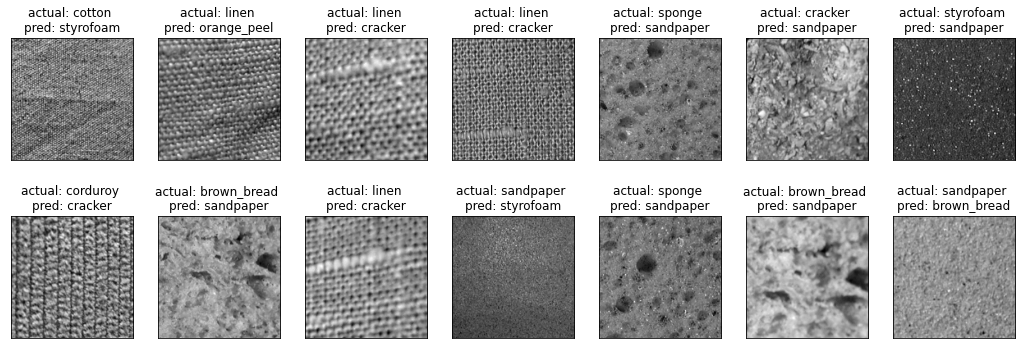

In [43]:
show_misclassifications(X_test, misclassifications, 
                        y_test, predictions, start_index=0)